# Group Project Thicket Python Code

In [55]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read in all the files

In [56]:
tk = th.Thicket.from_caliperreader(glob("merge_mpi/Merge_Input_Type_Random/*.cali"))

In [57]:
# Performance data
tk.dataframe

nid  \
node                                              profile           
{'name': 'main', 'type': 'function'}              226787529     1   
                                                  438552006     1   
                                                  490096836     1   
                                                  519913786     1   
                                                  602245483     1   
                                                  638750746     1   
                                                  1217082671    1   
                                                  1338692474    1   
                                                  1374369772    1   
                                                  1531870067    1   
                                                  1847063956    1   
                                                  1893598983    1   
                                                  2005667112    1   
                                                  2039307182    1   
                                                  2132386101    1   
                                                  2167770570    1   
                                                  2735615712    1   
                                                  2853405568    1   
                                                  2864365061    1   
                                                  3562228078    1   
                                                  3709639627    1   
                                                  3734203214    1   
                                                  3916958732    1   
                                                  4108413484    1   
{'name': 'comm', 'type': 'function'}              226787529     3   
                                                  438552006     3   
                                                  490096836     3   
                                                  519913786     3   
                                                  602245483     3   
                                                  638750746     3   
                                                  1217082671    3   
                                                  1338692474    3   
                                                  1374369772    3   
                                                  1531870067    3   
                                                  1847063956    3   
                                                  1893598983    3   
                                                  2005667112    3   
                                                  2039307182    3   
                                                  2132386101    3   
                                                  2167770570    3   
                                                  2735615712    3   
                                                  2853405568    3   
                                                  2864365061    3   
                                                  3562228078    3   
                                                  3709639627    3   
                                                  3734203214    3   
                                                  3916958732    3   
                                                  4108413484    3   
{'name': 'comm_large', 'type': 'function'}        226787529     4   
                                                  438552006     4   
                                                  490096836     4   
                                                  519913786     4   
                                                  602245483     4   
                                                  638750746     4   
                                                  1217082671    4   
                                                  1338692474    4   
                                                  1374369772

Groupby matrix size argument, available in the metadata (tk.metadata) to organize our performance data into 3 groupings.

In [58]:
tk.metadata

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:node.order,spot:output,spot:time.variance,user,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,InputType,num_procs,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,,,,
226787529,2.11.0-dev,64,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,merge_mpi/merge-p64-a65536-random.cali,true,andrew.hooper14,1700239124,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mergesort, 65536, 1, random]",c,Merge_Sort,MPI,Int,4,65536,random,64,11,"Online, AI"
438552006,2.11.0-dev,4,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,merge_mpi/merge-p4-a65536-random.cali,true,andrew.hooper14,1701451058,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mergesort, 65536, 1, random]",c,Merge_Sort,MPI,Int,4,65536,random,4,11,"Online, AI"
490096836,2.11.0-dev,256,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,merge_mpi/merge-p256-a65536-random.cali,true,andrew.hooper14,1700236261,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mergesort, 65536, 1, random]",c,Merge_Sort,MPI,Int,4,65536,random,256,11,"Online, AI"
519913786,2.11.0-dev,64,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,merge_mpi/merge-p64-a1048576-random.cali,true,andrew.hooper14,1700239124,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mergesort, 1048576, 1, random]",c,Merge_Sort,MPI,Int,4,1048576,random,64,11,"Online, AI"
602245483,2.11.0-dev,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,merge_mpi/merge-p2-a1048576-random.cali,true,andrew.hooper14,1701451077,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mergesort, 1048576, 1, random]",c,Merge_Sort,MPI,Int,4,1048576,random,2,11,"Online, AI"
638750746,2.11.0-dev,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,merge_mpi/merge-p2-a65536-random.cali,true,andrew.hooper14,1701451058,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mergesort, 65536, 1, random]",c,Merge_Sort,MPI,Int,4,65536,random,2,11,"Online, AI"
1217082671,2.11.0-dev,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,merge_mpi/merge-p2-a16777216-random.cali,true,andrew.hooper14,1701451064,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mergesort, 16777216, 1, random]",c,Merge_Sort,MPI,Int,4,16777216,random,2,11,"Online, AI"
1338692474,2.11.0-dev,8,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,merge_mpi/merge-p8-a1048576-random.cali,true,andrew.hooper14,1701451077,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mergesort, 1048576, 1, random]",c,Merge_Sort,MPI,Int,4,1048576,random,8,11,"Online, AI"
1374369772,2.11.0-dev,8,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,merge_mpi/merge-p8-a16777216-random.cali,true,andrew.hooper14,1701451078,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mergesort, 16777216, 1, random]",c,Merge_Sort,MPI,Int,4,16777216,random,8,11,"Online, AI"


In [59]:
gb = tk.groupby("InputSize")

3  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2b94632a2d00>, 1048576: <thicket.thicket.Thicket object at 0x2b9468380040>, 16777216: <thicket.thicket.Thicket object at 0x2b9463b84be0>}


Compose these 3 groups column-wise to get a holistic view of the data

In [60]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="num_procs"
)

ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="num_threads"
)

In [61]:
ctk.dataframe

65536  \
                                                              nid   
node                                              num_procs         
{'name': 'main', 'type': 'function'}              2             1   
                                                  4             1   
                                                  8             1   
                                                  16            1   
                                                  32            1   
                                                  64            1   
                                                  128           1   
                                                  256           1   
{'name': 'comm', 'type': 'function'}              2             3   
                                                  4             3   
                                                  8             3   
                                                  16            3   
                                                  32            3   
                                                  64            3   
                                                  128           3   
                                                  256           3   
{'name': 'comm_large', 'type': 'function'}        2             4   
                                                  4             4   
                                                  8             4   
                                                  16            4   
                                                  32            4   
                                                  64            4   
                                                  128           4   
                                                  256           4   
{'name': 'MPI_Gather', 'type': 'function'}        2             8   
                                                  4             8   
                                                  8             8   
                                                  16            8   
                                                  32            8   
                                                  64            8   
                                                  128           8   
                                                  256           8   
{'name': 'MPI_Scatter', 'type': 'function'}       2             5   
                                                  4             5   
                                                  8             5   
                                                  16            5   
                                                  32            5   
                                                  64            5   
                                                  128           5   
                                                  256           5   
{'name': 'comp', 'type': 'function'}              2             6   
                                                  4             6   
                                                  8             6   
                                                  16            6   
                                                  32            6   
                                                  64            6   
                                                  128           6   
                                                  256           6   
{'name': 'comp_large', 'type': 'function'}        2             9   
                                                  4             9   
                                                  8             9   
                                                  16            9   
                                                  32            9   
                                                  64            9   
                                                  128           9   
                                                  256     

Perform pandas operations to get the table in a desirable format for plotting

In [62]:
# Drop unwanted columns
ctk.dataframe = ctk.dataframe.reset_index().drop([("node",""),(65536,"nid"),(65536,"spot.channel"),(65536,"Min time/rank"),(65536,"Max time/rank"),(65536,"Total time"), (65536, "Variance time/rank")], axis=1)
ctk.dataframe = ctk.dataframe.reset_index().drop([(1048576,"nid"),(1048576,"spot.channel"),(1048576,"Min time/rank"),(1048576,"Max time/rank"),(1048576,"Total time"), (1048576, "Variance time/rank")], axis=1)
ctk.dataframe = ctk.dataframe.reset_index().drop([("index",""),("level_0",""),(16777216,"nid"),(16777216,"spot.channel"),(16777216,"Min time/rank"),(16777216,"Max time/rank"),(16777216,"Total time"), (16777216, "Variance time/rank")], axis=1)






ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])
# Drop "time" label as it is redundant
# ctk.dataframe.columns = ctk.dataframe.columns.droplevel(1)

In [63]:
ctk.dataframe

65536       1048576      16777216
                            Avg time/rank Avg time/rank Avg time/rank
name              num_procs                                          
main              2              0.739310      0.704512      3.988402
                  4              0.400966      0.485497      2.429164
                  8              0.743602      0.570970      1.943253
                  16             0.768956      0.802789      1.547639
                  32             1.342792      1.431319      1.888660
                  64             1.372862      1.416920      2.223078
                  128            1.429970      1.466294      2.296162
                  256            1.656293      1.731982      5.281544
comm              2              0.006859      0.017405      0.227295
                  4              0.003117      0.020204      0.315445
                  8              0.002153      0.022681      0.349153
                  16             0.003190      0.024788      0.365284
                  32             0.032699      0.037986      0.377508
                  64             0.019753      0.031244      0.688143
                  128            0.035700      0.038465      0.811857
                  256            0.024032      0.091430      2.985297
comm_large        2              0.006820      0.017370      0.227252
                  4              0.003083      0.020169      0.315405
                  8              0.002120      0.022643      0.349114
                  16             0.003154      0.024753      0.365245
                  32             0.032663      0.037951      0.377469
                  64             0.019719      0.031210      0.688106
                  128            0.035667      0.038431      0.811823
                  256            0.023998      0.091396      2.985260
MPI_Gather        2              0.000734      0.001203      0.017058
                  4              0.000134      0.000477      0.016871
                  8              0.000582      0.000356      0.010035
                  16             0.000329      0.000168      0.005049
                  32             0.001335      0.000595      0.002731
                  64             0.000093      0.002533      0.311310
                  128            0.001993      0.003268      0.407581
                  256            0.001332      0.003569      2.577523
MPI_Scatter       2              0.006042      0.016134      0.210139
                  4              0.002919      0.019660      0.298492
                  8              0.001510      0.022255      0.339035
                  16             0.002794      0.024554      0.360153
                  32             0.031294      0.037323      0.374695
                  64             0.019603      0.028647      0.376758
                  128            0.033650      0.035131      0.404206
                  256            0.022642      0.087794      0.407687
comp              2              0.010668      0.173585      3.263054
                  4              0.004719      0.086687      1.634682
                  8              0.002241      0.043384      0.817358
                  16             0.001203      0.021750      0.410741
                  32             0.000595      0.011076      0.206022
                  64             0.000301      0.005443      0.102751
                  128            0.000162      0.002721      0.051395
                  256            0.000088      0.001368      0.025751
comp_large        2              0.008147      0.124313      2.301460
                  4              0.007837      0.134504      2.481794
                  8              0.007969      0.145726      2.647724
                  16             0.008649      0.156894      2.826367
                  32             0.009668      0.168606      3.006525
                  64             0.010004      0.178492      3.175010
                  128            0.010684     

In [64]:
# var = ctk.dataframe.loc["comp_large", 1024]
# ctk.dataframe.loc["comp_large", 1024]

In [65]:
# Define common variables
function_names = set(ctk.dataframe.index.get_level_values("name"))
threads = sorted(list(set(ctk.dataframe.index.get_level_values("num_procs"))))
matrix_sizes = ctk.dataframe.columns.tolist()

# Plotting

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

In [66]:
def plot_pandas(df, title, xlabel, ylabel, loglog):
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
    )
    return plot

### Option 2
Use `matplotlib.pyplot` directly for more fine-grained control. Specifically for our case we can change the x axis scaling from base 10 to base 2.

In [67]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(matrix_sizes)
    plt.grid(True)
    plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

# Examples

## time

In [68]:
ctk.dataframe.loc["main"]

,65536,1048576,16777216
,Avg time/rank,Avg time/rank,Avg time/rank
num_procs,,,
2,0.739310,0.704512,3.988402
4,0.400966,0.485497,2.429164
8,0.743602,0.570970,1.943253
16,0.768956,0.802789,1.547639
32,1.342792,1.431319,1.888660
64,1.372862,1.416920,2.223078
128,1.429970,1.466294,2.296162
256,1.656293,1.731982,5.281544


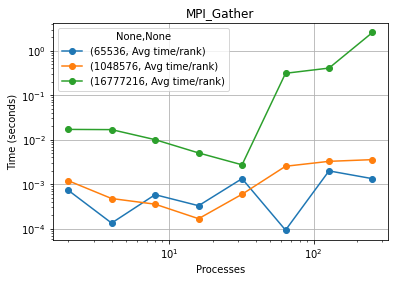

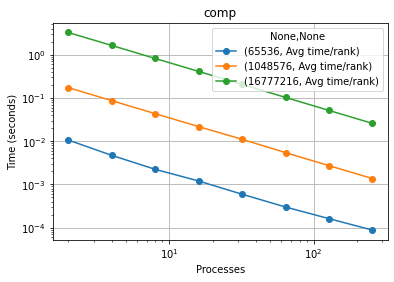

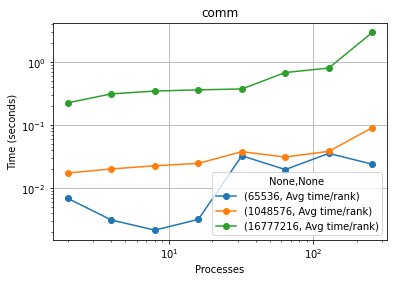

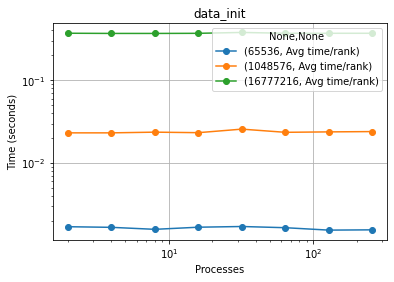

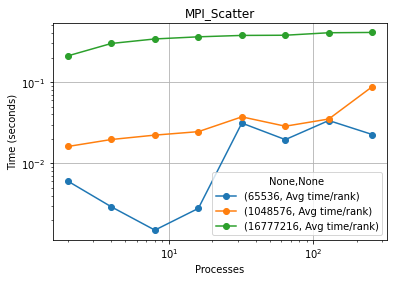

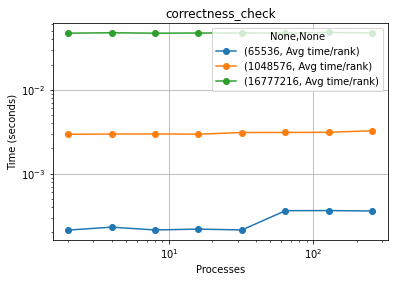

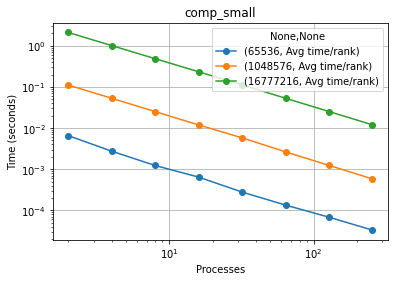

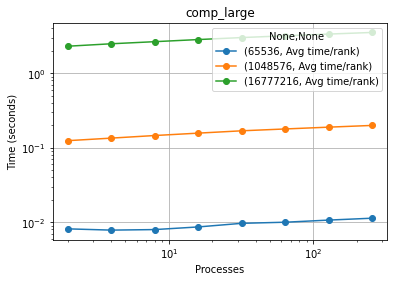

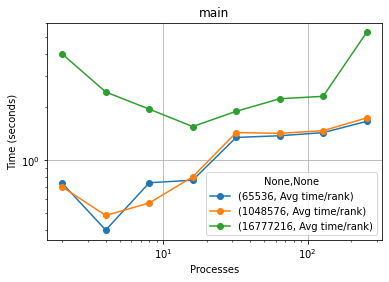

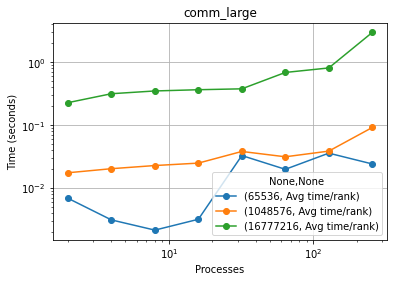

In [69]:
for name in function_names:
    plot_pandas(
        df=ctk.dataframe.loc[name],
        title=name,
        xlabel="Processes",
        ylabel="Time (seconds)",
        loglog=True
    )

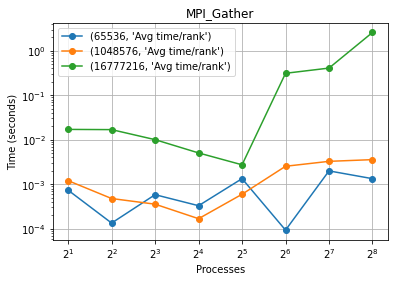

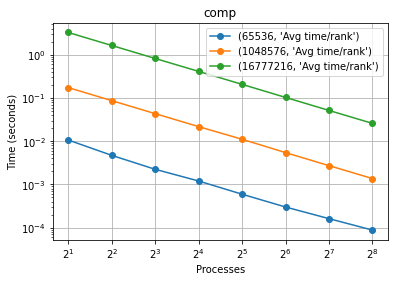

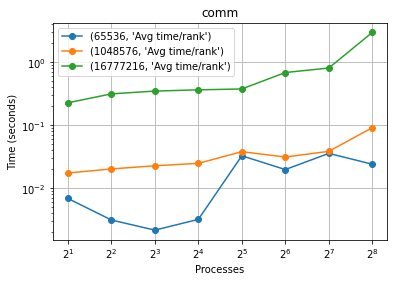

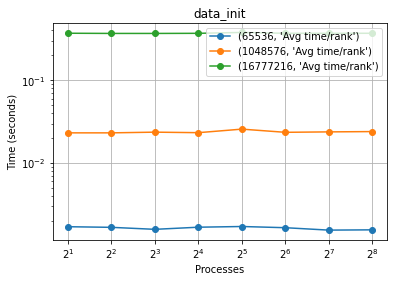

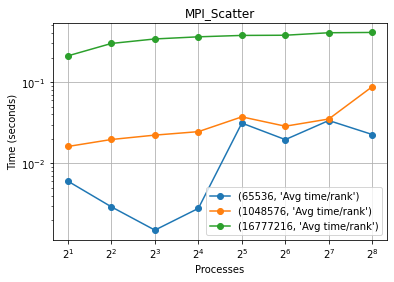

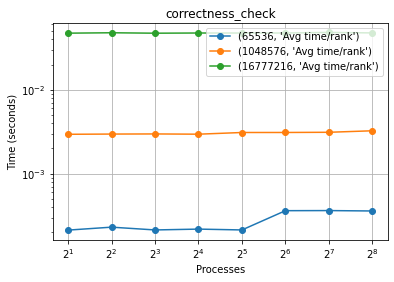

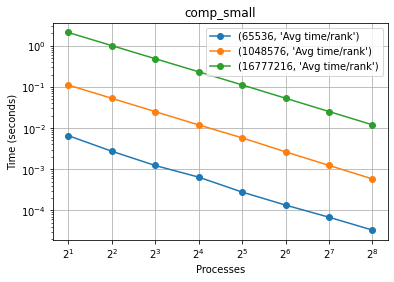

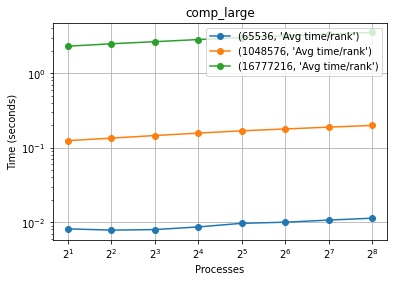

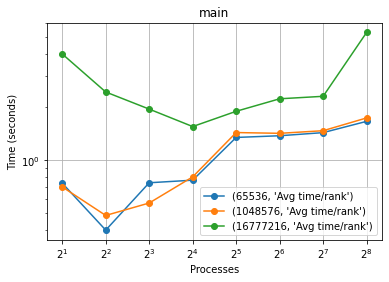

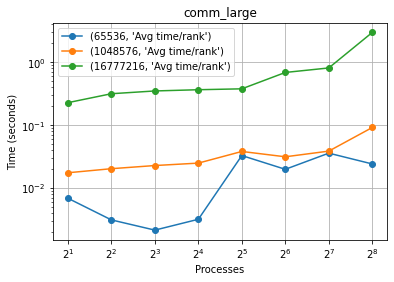

In [70]:
for name in function_names:
    plot_mpl(
        df=ctk.dataframe.loc[name],
        title=name,
        xlabel="Processes",
        ylabel="Time (seconds)",
    )

## Speedup

<ipython-input-71-8909543f5289>:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  speedup_df = ctk.dataframe.loc[(slice(None),64), :].reset_index().drop("num_procs", axis=1).set_index("name")/ctk.dataframe


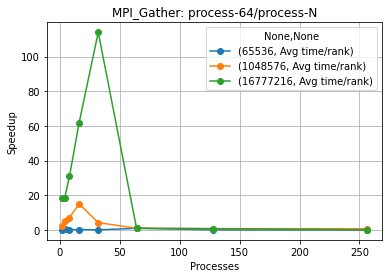

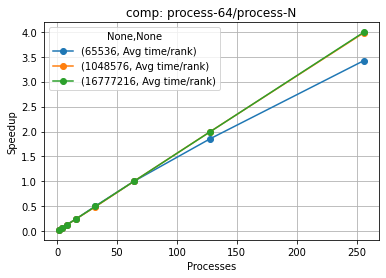

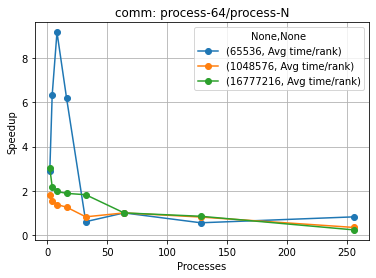

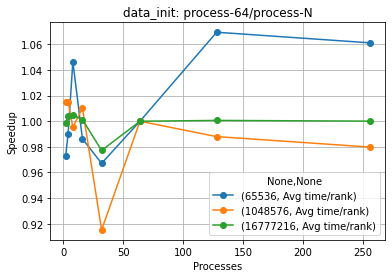

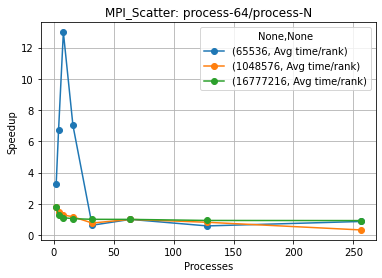

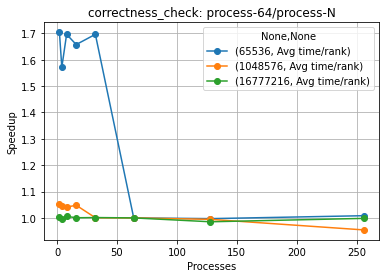

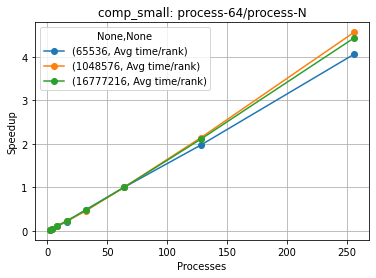

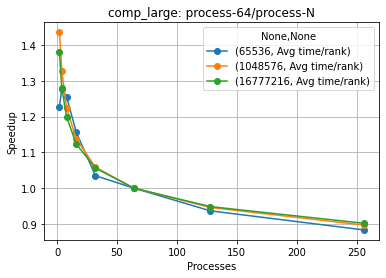

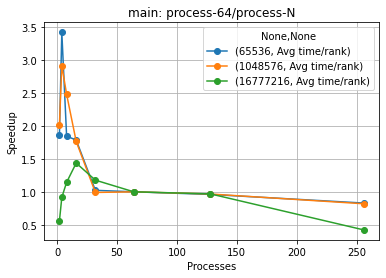

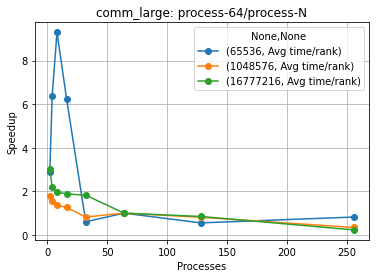

In [71]:
# print(ctk.dataframe.index.levels)

speedup_df = ctk.dataframe.loc[(slice(None),64), :].reset_index().drop("num_procs", axis=1).set_index("name")/ctk.dataframe

for name in function_names:
    plot_pandas(
        df=speedup_df.loc[name],
        title=f"{name}: process-64/process-N",
        xlabel="Processes",
        ylabel="Speedup",
        loglog=False
    )

In [72]:
 print(ctk.dataframe.index.levels)

[['MPI_Gather', 'MPI_Scatter', 'comm', 'comm_large', 'comp', 'comp_large', 'comp_small', 'correctness_check', 'data_init', 'main'], [2, 4, 8, 16, 32, 64, 128, 256]]
